In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

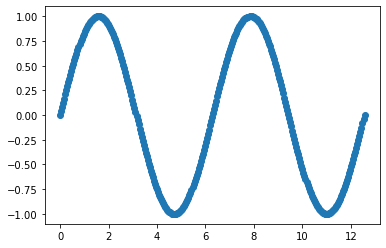

In [2]:
N = 300
error = 0
time_arr = np.linspace(0, 4*np.pi, N)
time = torch.tensor(time_arr) #.requires_grad_() 
signal = torch.sin(time) + torch.randn(N)*error

plt.plot(time_arr, signal, '-o')

In [3]:
def get_derivs(x, y):
    """
    Return the derivatives of y w.r.t. x
    """
    dydx = np.gradient(y, x)
    d2ydx2 = np.gradient(dydx, x)
    return dydx, d2ydx2

In [4]:
def model_predict(params, x, y, dx):
    
    y_pred = torch.zeros(len(x))
    i = 0
    for x, y in zip(x, y): 
        
        dydx, d2ydx2 = get_derivs(x, y)
        y_pred[i] = params[0]*y[-1] + params[1]*dydx[-1]*dx + params[2]*d2ydx2[-1]*dx**2 
        i += 1
        
    return y_pred

def rms_loss(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()

def update_params(lr, params): 
    params.data -= lr * params.grad.data
    params.grad = None
    return params

In [41]:
params = torch.tensor([0,0,0.]).requires_grad_()
dt = time[1] - time[0]

x_train = time_arr.reshape(-1, 3)[:-1]
signal_train = signal.reshape(-1, 3)[:-1]

y_train = signal[3::3]
pred_times = time[3::3]

Loss: 0.00151, - params: tensor([ 9.6379e-01,  6.6597e-03, -8.4519e-04], requires_grad=True)


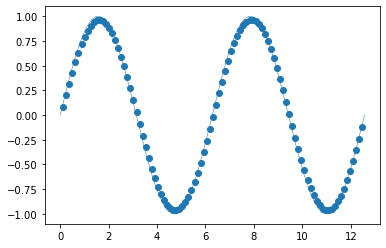

Loss: 0.00095, - params: tensor([ 9.8628e-01,  8.4201e-03, -8.6349e-04], requires_grad=True)


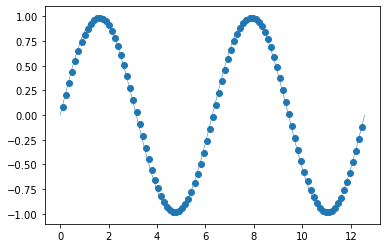

Loss: 0.00087, - params: tensor([ 9.9445e-01,  1.0165e-02, -8.6917e-04], requires_grad=True)


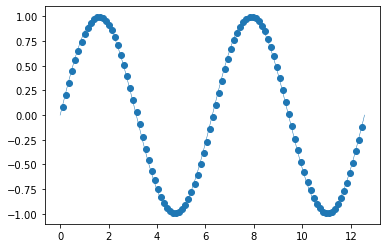

Loss: 0.00086, - params: tensor([ 9.9742e-01,  1.1901e-02, -8.7026e-04], requires_grad=True)


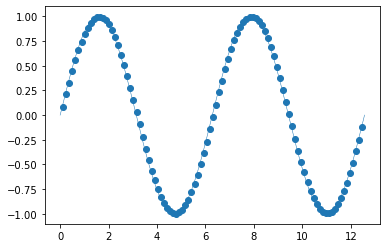

Loss: 0.00085, - params: tensor([ 9.9850e-01,  1.3633e-02, -8.6968e-04], requires_grad=True)


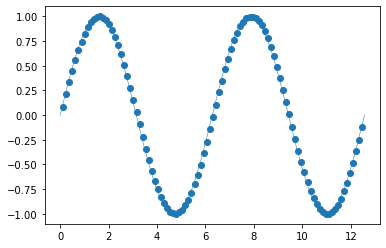

Loss: 0.00085, - params: tensor([ 9.9889e-01,  1.5362e-02, -8.6850e-04], requires_grad=True)


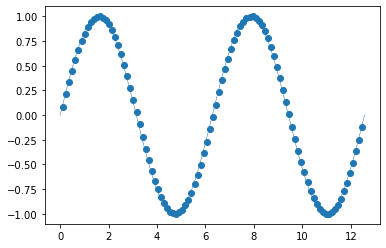

Loss: 0.00085, - params: tensor([ 9.9903e-01,  1.7087e-02, -8.6710e-04], requires_grad=True)


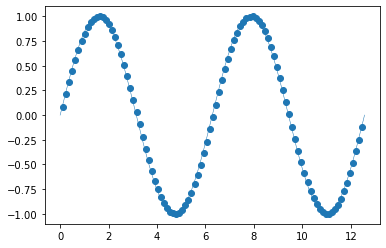

Loss: 0.00084, - params: tensor([ 9.9908e-01,  1.8809e-02, -8.6563e-04], requires_grad=True)


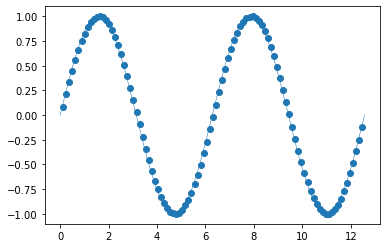

Loss: 0.00084, - params: tensor([ 9.9910e-01,  2.0528e-02, -8.6412e-04], requires_grad=True)


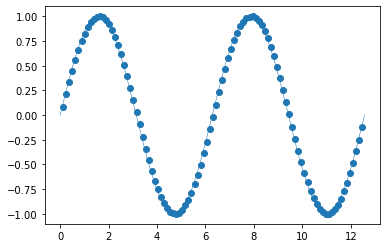

Loss: 0.00084, - params: tensor([ 9.9911e-01,  2.2244e-02, -8.6261e-04], requires_grad=True)


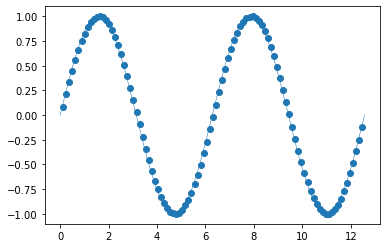

<Figure size 432x288 with 0 Axes>

In [47]:
for j in range(1000):
    preds = model_predict(params, x_train, signal_train, dt)
    loss = rms_loss(y_train, preds)
    loss.backward()
    params = update_params(1e-2, params)
    if j%100 == 0:
        print('Loss: {:.5f}, - params: {}'.format(loss, params))
        plt.plot(time, signal, lw=.5)
        plt.scatter(pred_times, preds.detach())
        plt.show()
        plt.clf()